### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

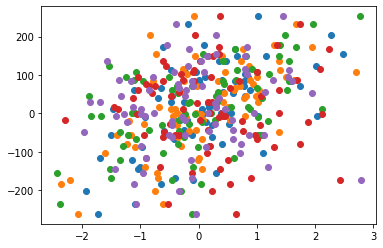

In [123]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(5):
  plt.scatter(X_train[:,i], y_train)

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [127]:
import numpy as np

class LinearRegression:
    theta = None
    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.00001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        self.theta = np.zeros((X.shape[1], 1))
        m = y.size
        costarray = []
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.theta)

            cost = (1/(2*m))*np.sum(np.square(y_pred - y))

           

            d_theta = (1/m)*np.dot(X.T, y_pred - y)

            self.theta = self.theta - self.learning_rate*d_theta

            costarray.append(cost)

            if(i%(self.n_iters/20) == 0):
              print("Cost is :", cost)
                
        return self.theta
            
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
      return np.dot(X, self.theta)

     # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [134]:
# Now, we make an object of our custom class.
regressor = LinearRegression(0.00001,100000) # You may pass the custom parameters or let the default values take it ahead

regressor.fit(X_train, y_train)

# Call the fit method on the object to train (pass appropriate part of dataset)


# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

Cost is : 5891.273399125076
Cost is : 5379.899027746527
Cost is : 4915.964351750445
Cost is : 4494.903798471735
Cost is : 4112.60853466565
Cost is : 3765.3789961104385
Cost is : 3449.8825276375665
Cost is : 3163.115566404673
Cost is : 2902.3698657711475
Cost is : 2665.202314189628
Cost is : 2449.407953971601
Cost is : 2252.9958493989575
Cost is : 2074.167493120552
Cost is : 1911.2974746977548
Cost is : 1762.9161660765892
Cost is : 1627.6942061358359
Cost is : 1504.4285907035533
Cost is : 1392.0301959125522
Cost is : 1289.512581801116
Cost is : 1195.9819399406117


### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [145]:
def mean_squared_error(y_true, y_pred):
    y_true = np.reshape(y_true, (20,1)) 
    m = y.size
    cost = (1/m)*np.sum(np.square(y_pred - y_true))
    return cost

def r2_score(y_true, y_pred):
    y_true = np.reshape(y_true, (20,1)) 
    mn = np.mean(y_true)
    ssr = np.sum(np.square(y_true - y_pred))
    sst = np.sum(np.square(y_true - mn))
    return 1 - (ssr/sst)
          

mse = mean_squared_error(y_test, predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test, predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 448.5153643771113
Accuracy: 0.7879894942835788
